#### Import packages

In [1]:
import glob
from os import listdir
from os.path import isfile, join
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 999)

#### Read all files that locate in the predefined path and concatanate into a single dataframe

In [2]:
path='google_month'
onlyfiles = [f for f in listdir(path) if isfile(join(path, f))]

data = []
for i in range(len(onlyfiles)):
    df = pd.read_csv(''.join([path,'/',onlyfiles[i]]))
    df['date'] = np.repeat(onlyfiles[i].split(".")[1], [len(df)], axis=0)
    data.append(df)
    
data = pd.concat(data, axis=0).reset_index(drop=True)
# data.to_csv('data.csv') # Save dataset
# print(len(data))

#### Remove WCDMA measurements and sort in chronological order

In [3]:
data = data.loc[data['Cellular sector ID'].str.startswith('lte', na=False)].reset_index(drop=True)
data['date'] = pd.to_datetime(data.date,format='%Y/%m/%d')
data.sort_values('date').reset_index(drop=True)
# data.to_csv('data_month.csv') # Save dataset

Cellular sector ID  Location (lat)  Location (lng)  \
0        lte:234:10:32928:133916280        53.94770        -0.91848   
1         lte:234:10:17072:26698606        51.89995        -2.06558   
2         lte:234:10:17072:26698616        51.89805        -2.07503   
3         lte:234:10:17072:26461314        51.89820        -2.07838   
4         lte:234:10:17072:27612792        51.90113        -2.07826   
5         lte:234:10:17072:27612802        51.90426        -2.08591   
6         lte:234:10:17072:26435438        51.89327        -2.08842   
7         lte:234:10:17072:26461304        51.89414        -2.07895   
8         lte:234:10:17072:26557826        51.88792        -2.08027   
9         lte:234:10:17072:26602370        51.88646        -2.08786   
10        lte:234:10:17072:26557816        51.87664        -2.07546   
11        lte:234:10:17072:28330626        51.88440        -2.06888   
12        lte:234:10:17072:26450040        51.89207        -2.06524   
13        lte:234:10:17072:26461294        51.89655        -2.07104   
14        lte:234:10:17072:28330616        51.87679        -2.05786   
15        lte:234:10:17072:26698626        51.90297        -2.07239   
16        lte:234:10:17072:28330606        51.88607        -2.05395   
17        lte:234:10:17072:26450050        51.89868        -2.06282   
18        lte:234:10:17072:26622584        51.90461        -2.06375   
19        lte:234:10:17072:26622574        51.90497        -2.05259   
20        lte:234:10:17072:26364024        51.91157        -2.05579   
21        lte:234:10:17072:26622594        51.90949        -2.06367   
22        lte:234:10:17072:26529656        51.91174        -2.04331   
23        lte:234:10:17072:26546040        51.93409        -2.06545   
24        lte:234:10:17088:27315822        51.95867        -2.06437   
25        lte:234:10:17072:26925166        51.95558        -2.06632   
26        lte:234:10:17072:26546050        51.94612        -2.06072   
27        lte:234:10:17072:28463982        51.94473        -2.06940   
28        lte:234:10:17072:28464002        51.95340        -2.07475   
29        lte:234:10:17072:26382978        51.93083        -2.06996   
...                             ...             ...             ...   
1370933    lte:234:10:128:129272174        50.95448        -0.12828   
1370934    lte:234:10:128:129272188        50.95236        -0.12827   
1370935    lte:234:10:128:129272184        50.95073        -0.13097   
1370936    lte:234:10:128:133790850        50.95557        -0.13568   
1370937    lte:234:10:128:133790854        50.95553        -0.13171   
1370938    lte:234:10:128:128121208        50.96445        -0.12973   
1370939    lte:234:10:128:134120046        50.96609        -0.07341   
1370940    lte:234:10:144:130565752        50.80558        -0.05961   
1370941    lte:234:10:144:129108334        50.86286        -0.08305   
1370942    lte:234:10:144:129108338        50.86273        -0.08488   
1370943    lte:234:10:144:130565742        50.80318        -0.05218   
1370944    lte:234:10:144:128018296        50.80262        -0.03975   
1370945    lte:234:10:144:128018300        50.80331        -0.03917   
1370946    lte:234:10:144:128018286        50.79556        -0.01382   
1370947    lte:234:10:144:128018290        50.79747        -0.01892   
1370948     lte:234:10:16:133125250        50.79592        -0.00489   
1370949     lte:234:10:16:130971256        50.86610        -0.00638   
1370950     lte:234:10:16:130971260        50.86911        -0.00571   
1370951    lte:234:10:144:129108339        50.86294        -0.08574   
1370952     lte:234:10:16:130971266        50.87561        -0.00352   
1370953     lte:234:10:16:130075778        50.88192        -0.00034   
1370954    lte:234:10:144:130435182        50.86687        -0.02013   
1370955    lte:234:10:144:130435192        50.86556        -0.04127   
1370956    lte:234:10:144:129789550        50.86576        -0.06283   
1370957    lte:234:10:144:128087938      

#### Select a subset of the sectors (after shuffling) and sort in chronological order

In [4]:
all_sectors = data['Cellular sector ID'].unique()
np.random.shuffle(all_sectors)
some_sectors = all_sectors[0:10000]

subset = data.loc[data['Cellular sector ID'].isin(some_sectors)]
subset = subset.sort_values('date').reset_index(drop = True)
subset.to_csv('data_subset.csv')

#### Select only the columns of interest (Cellular sector ID,date, + Features) - Drop NA values

In [5]:
KPI = 'YouTube goodput'

subset_cut = subset[['Cellular sector ID', KPI, 'date']]
subset_cut = subset_cut.dropna().reset_index(drop=True)

#### Feature Engineering - Add features statistics

In [6]:
subset1 = subset_cut.copy()
# Encode date to integer
subset1['date_enc'] = (subset1['date'] - subset1['date'].min()).astype('timedelta64[D]').astype(int) + 1

# YouTube goodput in the previous day
subset1['Last_Day'] = subset1.groupby(['Cellular sector ID'])[KPI].shift() 
# Difference between YouTube goodput in the previous day and the day before (t-1 - t-2)
subset1['Last_Day_Diff'] = subset1.groupby(['Cellular sector ID'])['Last_Day'].diff()
subset1 = subset1.dropna()
subset1.head()

Cellular sector ID  YouTube goodput       date  date_enc  \
5621  lte:234:10:4224:128269678             6.98 2018-09-05         3   
5622  lte:234:10:4224:128269688             8.25 2018-09-05         3   
5624   lte:234:10:512:129277806             7.05 2018-09-05         3   
5625   lte:234:10:512:134480248             6.21 2018-09-05         3   
5626   lte:234:10:512:133974658             2.54 2018-09-05         3   

      Last_Day  Last_Day_Diff  
5621      9.32          -1.38  
5622      6.09           1.33  
5624      6.76           0.59  
5625      8.76           0.12  
5626      4.24          -1.93

#### Define an evaluation metric (Root Mean Squared Log Error)

In [8]:
from sklearn.metrics import mean_squared_log_error

def rmsle(ytrue, ypred):
    return np.sqrt(mean_squared_log_error(ytrue, ypred))

#### Set a baseline to beat

In [9]:
mean_error = []
for day in range(23,33):
    train = subset1[subset1['date_enc'] < day]
    val = subset1[subset1['date_enc'] == day]
    
    p = val['Last_Day'].values # Use the last day of YouTube goodput as a prediction for the YouTube of this week.
    
    error = rmsle(val[KPI].values, p)
    print('Day %d - Error %.5f' % (day, error))
    mean_error.append(error)
print('Mean Error = %.5f' % np.mean(mean_error))

Day 23 - Error 0.43614
Day 24 - Error 0.42404
Day 25 - Error 0.43182
Day 26 - Error 0.42834
Day 27 - Error 0.47150
Day 28 - Error 0.47374
Day 29 - Error 0.49545
Day 30 - Error 0.44232
Day 31 - Error 0.44076
Day 32 - Error 0.43086
Mean Error = 0.44750


In [11]:
val

Cellular sector ID  YouTube goodput       date  date_enc  \
96068  lte:234:10:34448:130886264             6.75 2018-10-04        32   
96069  lte:234:10:34448:130799214            10.80 2018-10-04        32   
96070  lte:234:10:34449:129647726             2.93 2018-10-04        32   
96071  lte:234:10:34448:130703480             1.90 2018-10-04        32   
96072    lte:234:10:736:131287170             3.14 2018-10-04        32   
96073  lte:234:10:34449:133673592             3.33 2018-10-04        32   
96074  lte:234:10:34448:129651330             7.91 2018-10-04        32   
96075  lte:234:10:34464:129670264             3.44 2018-10-04        32   
96076  lte:234:10:34448:133165186             2.97 2018-10-04        32   
96078  lte:234:10:34464:129670274             8.92 2018-10-04        32   
96080  lte:234:10:32896:128323960            15.20 2018-10-04        32   
96082  lte:234:10:32896:128360312             4.18 2018-10-04        32   
96083    lte:234:10:736:130621038             3.51 2018-10-04        32   
96084  lte:234:10:34448:129651310            11.90 2018-10-04        32   
96085    lte:234:10:736:130807918             4.03 2018-10-04        32   
96086  lte:234:10:32896:128804738             8.21 2018-10-04        32   
96087    lte:234:10:736:133369474             4.42 2018-10-04        32   
96088  lte:234:10:32896:128804728             6.49 2018-10-04        32   
96089  lte:234:10:34449:133706872            12.10 2018-10-04        32   
96090  lte:234:10:34448:131144834             4.14 2018-10-04        32   
96091  lte:234:10:34449:130470018             3.84 2018-10-04        32   
96092    lte:234:10:736:133781624             6.66 2018-10-04        32   
96093    lte:234:10:736:133364334             7.58 2018-10-04        32   
96094    lte:234:10:736:130817144             7.34 2018-10-04        32   
96095    lte:234:10:736:133364339             5.77 2018-10-04        32   
96096    lte:234:10:736:133364344             6.93 2018-10-04        32   
96097    lte:234:10:736:133559918             2.91 2018-10-04        32   
96098    lte:234:10:736:131339394             4.18 2018-10-04        32   
96099    lte:234:10:736:130684034             7.02 2018-10-04        32   
96101  lte:234:10:32912:128344962             3.11 2018-10-04        32   
...                           ...              ...        ...       ...   
99465    lte:234:10:128:128879470             6.39 2018-10-04        32   
99466   lte:234:10:17040:28108408             3.51 2018-10-04        32   
99467   lte:234:10:16592:26731906             7.32 2018-10-04        32   
99468   lte:234:10:14464:25724290            10.50 2018-10-04        32   
99469   lte:234:10:14464:25848184            10.20 2018-10-04        32   
99470   lte:234:10:16592:27772782             7.95 2018-10-04        32   
99471   lte:234:10:16592:27844472             4.46 2018-10-04        32   
99472   lte:234:10:16592:27380098             6.95 2018-10-04        32   
99473    lte:234:10:128:128120686             2.90 2018-10-04        32   
99474    lte:234:10:128:129997934             3.45 2018-10-04        32   
99475    lte:234:10:128:128588162             9.41 2018-10-04        32   
99476    lte:234:10:128:134672504             4.18 2018-10-04        32   
99477    lte:234:10:128:133790850            10.80 2018-10-04        32   
99478     lte:234:10:16:130075778            12.50 2018-10-04        32   
99480    lte:234:10:144:128018296            10.10 2018-10-04        32   
99481    lte:234:10:144:130918530            12.00 2018-10-04        32   
99482    lte:234:10:144:130175612             3.93 2018-10-04        32   
99483    lte:234:10:144:128003960             1.87 2018-10-04        32   
99484    lte:234:10:144:128003950             2.19 2018-10-04        32   
99485    lte:234:10:144:128994178             6.33 2018-10-04        32   
99486    lte:234:10:144:130063480             2.04 2018-10-04        32   
99487    lte:234:10:144:129483128       

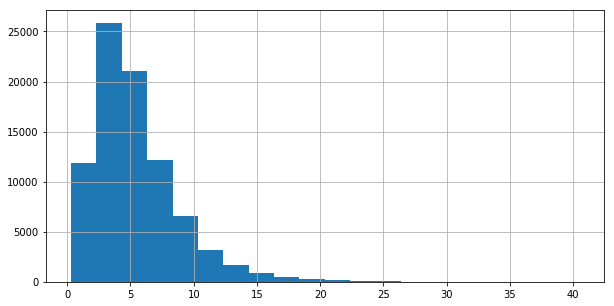

In [208]:
subset1[KPI].hist(bins=20, figsize=(10,5))

#### Drop 'date' and 'Cellular sector ID' before feeding the data into the model

In [210]:
subset1 = subset1.drop(columns=['date','Cellular sector ID'])

#### Random Forests

In [211]:
from sklearn.ensemble import RandomForestRegressor

mean_error = []
for day in range(23,33):
    train = subset1[subset1['date_enc'] < day]
    val = subset1[subset1['date_enc'] == day]
    
    xtr, xts = train.drop([KPI], axis=1), val.drop([KPI], axis=1)
    ytr, yts = train[KPI].values, val[KPI].values
    
    mdl = RandomForestRegressor(n_estimators=1000, n_jobs=-1, random_state=0) 
    mdl.fit(xtr, ytr)
    
    p = mdl.predict(xts)
    
    error = rmsle(yts, p)
    print('Day %d - Error %.5f' % (day, error))
    mean_error.append(error)
print('Mean Error = %.5f' % np.mean(mean_error))

Day 23 - Error 0.43643
Day 24 - Error 0.41231
Day 25 - Error 0.40349
Day 26 - Error 0.40072
Day 27 - Error 0.42725
Day 28 - Error 0.44319
Day 29 - Error 0.47754
Day 30 - Error 0.45093
Day 31 - Error 0.40960
Day 32 - Error 0.40344
Mean Error = 0.42649


### Add additive lags (1 day)

In [214]:
subset2 = subset_cut.copy()
# Encode date to integer
subset2['date_enc'] = (subset2['date'] - subset2['date'].min()).astype('timedelta64[D]').astype(int) + 1

subset2['Last_Day'] = subset2.groupby(['Cellular sector ID'])[KPI].shift()
subset2['Last_Day_Diff'] = subset2.groupby(['Cellular sector ID'])['Last_Day'].diff()
subset2['Last-1_Day'] = subset2.groupby(['Cellular sector ID'])[KPI].shift(2)
subset2['Last-1_Week_Diff'] = subset2.groupby(['Cellular sector ID'])['Last-1_Day'].diff()
subset2 = subset2.dropna()
subset2.head()

# Drop 'date' and 'Cellular sector ID' before feeding the data into the model
subset2 = subset2.drop(columns=['date','Cellular sector ID'])

In [215]:
mean_error = []
for day in range(23,33):
    train = subset2[subset2['date_enc'] < day]
    val = subset2[subset2['date_enc'] == day]
    
    xtr, xts = train.drop([KPI], axis=1), val.drop([KPI], axis=1)
    ytr, yts = train[KPI].values, val[KPI].values
    
    mdl = RandomForestRegressor(n_estimators=1000, n_jobs=-1, random_state=0)
    mdl.fit(xtr, ytr)
    
    p = mdl.predict(xts)
    
    error = rmsle(yts, p)
    print('Week %d - Error %.5f' % (day, error))
    mean_error.append(error)
print('Mean Error = %.5f' % np.mean(mean_error))

Week 23 - Error 0.41405
Week 24 - Error 0.40123
Week 25 - Error 0.38392
Week 26 - Error 0.38136
Week 27 - Error 0.40706
Week 28 - Error 0.41372
Week 29 - Error 0.44918
Week 30 - Error 0.43494
Week 31 - Error 0.40241
Week 32 - Error 0.38095
Mean Error = 0.40688


### Add additive lags (2 days)

In [6]:
subset3 = subset_cut.copy()
# Encode date to integer
subset3['date_enc'] = (subset3['date'] - subset3['date'].min()).astype('timedelta64[D]').astype(int) + 1

subset3['Last_Day'] = subset3.groupby(['Cellular sector ID'])[KPI].shift()
subset3['Last_Day_Diff'] = subset3.groupby(['Cellular sector ID'])['Last_Day'].diff()
subset3['Last-1_Day'] = subset3.groupby(['Cellular sector ID'])[KPI].shift(2)
subset3['Last-1_Week_Diff'] = subset3.groupby(['Cellular sector ID'])['Last-1_Day'].diff()
subset3['Last-2_Day'] = subset3.groupby(['Cellular sector ID'])[KPI].shift(3)
subset3['Last-2_Week_Diff'] = subset3.groupby(['Cellular sector ID'])['Last-2_Day'].diff()
subset3 = subset3.dropna()
subset3.head()

# Drop 'date' and 'Cellular sector ID' before feeding the data into the model
subset3 = subset3.drop(columns=['date','Cellular sector ID'])

In [217]:
mean_error = []
for day in range(23,33):
    train = subset3[subset3['date_enc'] < day]
    val = subset3[subset3['date_enc'] == day]
    
    xtr, xts = train.drop([KPI], axis=1), val.drop([KPI], axis=1)
    ytr, yts = train[KPI].values, val[KPI].values
    
    mdl = RandomForestRegressor(n_estimators=1000, n_jobs=-1, random_state=0)
    mdl.fit(xtr, ytr)
    
    p = mdl.predict(xts)
    
    error = rmsle(yts, p)
    print('Week %d - Error %.5f' % (day, error))
    mean_error.append(error)
print('Mean Error = %.5f' % np.mean(mean_error))

Week 23 - Error 0.39634
Week 24 - Error 0.38646
Week 25 - Error 0.37983
Week 26 - Error 0.37066
Week 27 - Error 0.39465
Week 28 - Error 0.39830
Week 29 - Error 0.42292
Week 30 - Error 0.40689
Week 31 - Error 0.38840
Week 32 - Error 0.38180
Mean Error = 0.39263


### Gradient Boosted Trees

In [11]:
import lightgbm as lgb

mean_error = []
for day in range(23,33):
    train = subset3[subset3['date_enc'] < day]
    val = subset3[subset3['date_enc'] == day]
    
    xtr, xts = train.drop([KPI], axis=1), val.drop([KPI], axis=1)
    ytr, yts = train[KPI].values, val[KPI].values
    
    mdl = lgb.LGBMRegressor(n_estimators=1000, learning_rate=0.01)
    mdl.fit(xtr, ytr)
    
    p = mdl.predict(xts)
    
    error = rmsle(yts, p)
    print('Week %d - Error %.5f' % (day, error))
    mean_error.append(error)
print('Mean Error = %.5f' % np.mean(mean_error))

Week 23 - Error 0.38133
Week 24 - Error 0.36742
Week 25 - Error 0.36249
Week 26 - Error 0.34646
Week 27 - Error 0.40323
Week 28 - Error 0.39296
Week 29 - Error 0.40230
Week 30 - Error 0.37037
Week 31 - Error 0.36497
Week 32 - Error 0.35884
Mean Error = 0.37504


### XgBoost

In [13]:
from xgboost import XGBRegressor

mean_error = []
for day in range(23,33):
    train = subset3[subset3['date_enc'] < day]
    val = subset3[subset3['date_enc'] == day]
    
    xtr, xts = train.drop([KPI], axis=1), val.drop([KPI], axis=1)
    ytr, yts = train[KPI].values, val[KPI].values
    
    mdl = XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.01,
                max_depth = 5, alpha = 10, n_estimators = 1000)

    mdl.fit(xtr, ytr)
    
    p = mdl.predict(xts)
    
    error = rmsle(yts, p)
    print('Week %d - Error %.5f' % (day, error))
    mean_error.append(error)
print('Mean Error = %.5f' % np.mean(mean_error))

Week 23 - Error 0.37884
Week 24 - Error 0.36229
Week 25 - Error 0.35826
Week 26 - Error 0.34670
Week 27 - Error 0.40487
Week 28 - Error 0.39090
Week 29 - Error 0.40199
Week 30 - Error 0.37153
Week 31 - Error 0.36427
Week 32 - Error 0.35616
Mean Error = 0.37358


### Predictions for Day 33 (scatter plot)

/home/b.kko/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


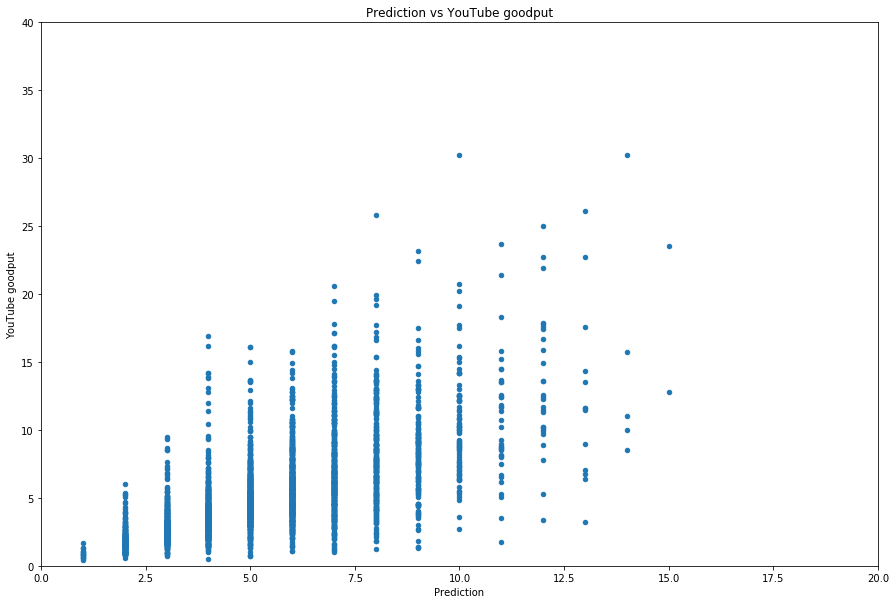

In [18]:
val.loc[:, 'Prediction'] = np.round(p)
val.plot.scatter(x='Prediction', y=KPI, figsize=(15,10), title='Prediction vs YouTube goodput', 
                 ylim=(0,40), xlim=(0,20))

### Predictions for Day 33 (box plot)

[Text(0,0,'1.0'),
 Text(0,0,'2.0'),
 Text(0,0,'3.0'),
 Text(0,0,'4.0'),
 Text(0,0,'5.0'),
 Text(0,0,'6.0'),
 Text(0,0,'7.0'),
 Text(0,0,'8.0'),
 Text(0,0,'9.0'),
 Text(0,0,'10.0'),
 Text(0,0,'11.0'),
 Text(0,0,'12.0'),
 Text(0,0,'13.0'),
 Text(0,0,'14.0'),
 Text(0,0,'15.0')]

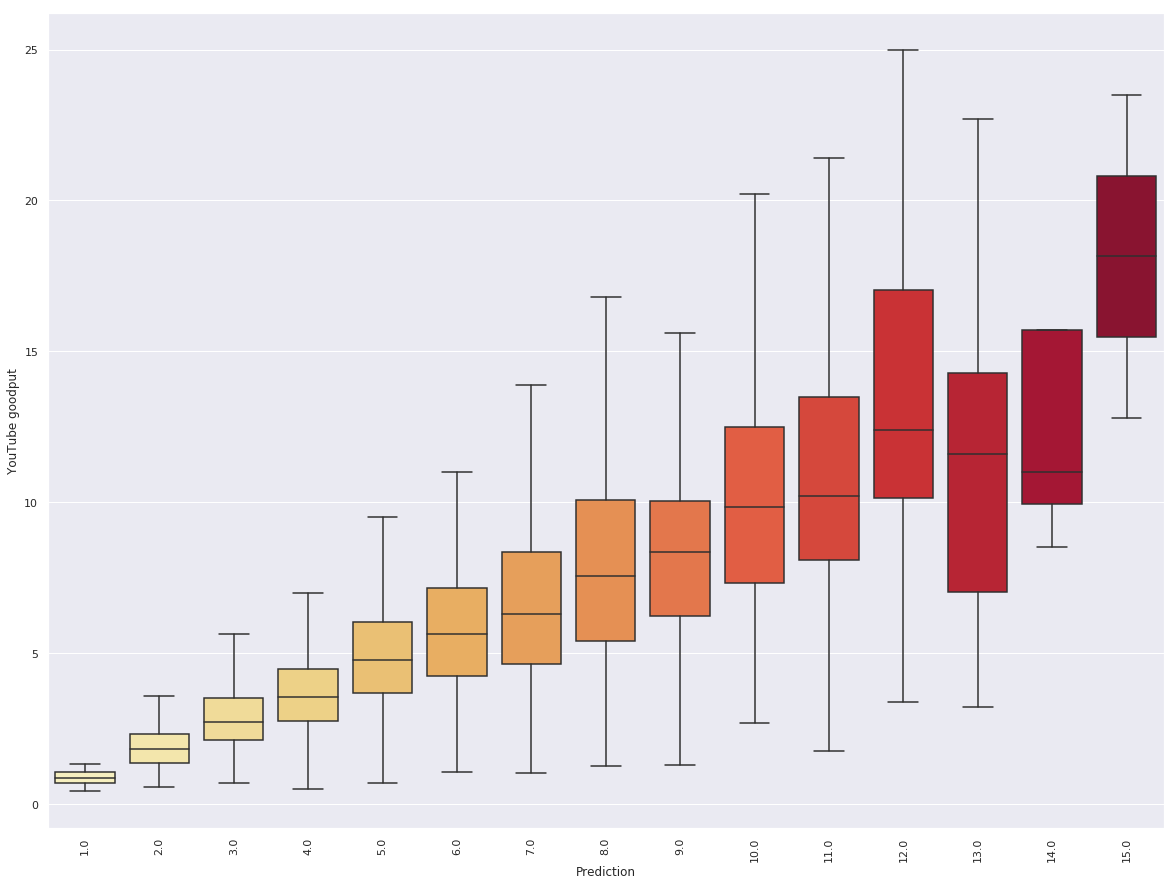

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(rc={'figure.figsize':(20,15)})
g = sns.boxplot(x=val['Prediction'], y=val['YouTube goodput'], data=val, showfliers=False, palette="YlOrRd")
g.set_xticklabels(g.get_xticklabels(),rotation=90)

### Predictions for Day 33 (violin plot)

/home/b.kko/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


[Text(0,0,'1.0'),
 Text(0,0,'2.0'),
 Text(0,0,'3.0'),
 Text(0,0,'4.0'),
 Text(0,0,'5.0'),
 Text(0,0,'6.0'),
 Text(0,0,'7.0'),
 Text(0,0,'8.0'),
 Text(0,0,'9.0'),
 Text(0,0,'10.0'),
 Text(0,0,'11.0'),
 Text(0,0,'12.0'),
 Text(0,0,'13.0'),
 Text(0,0,'14.0'),
 Text(0,0,'15.0')]

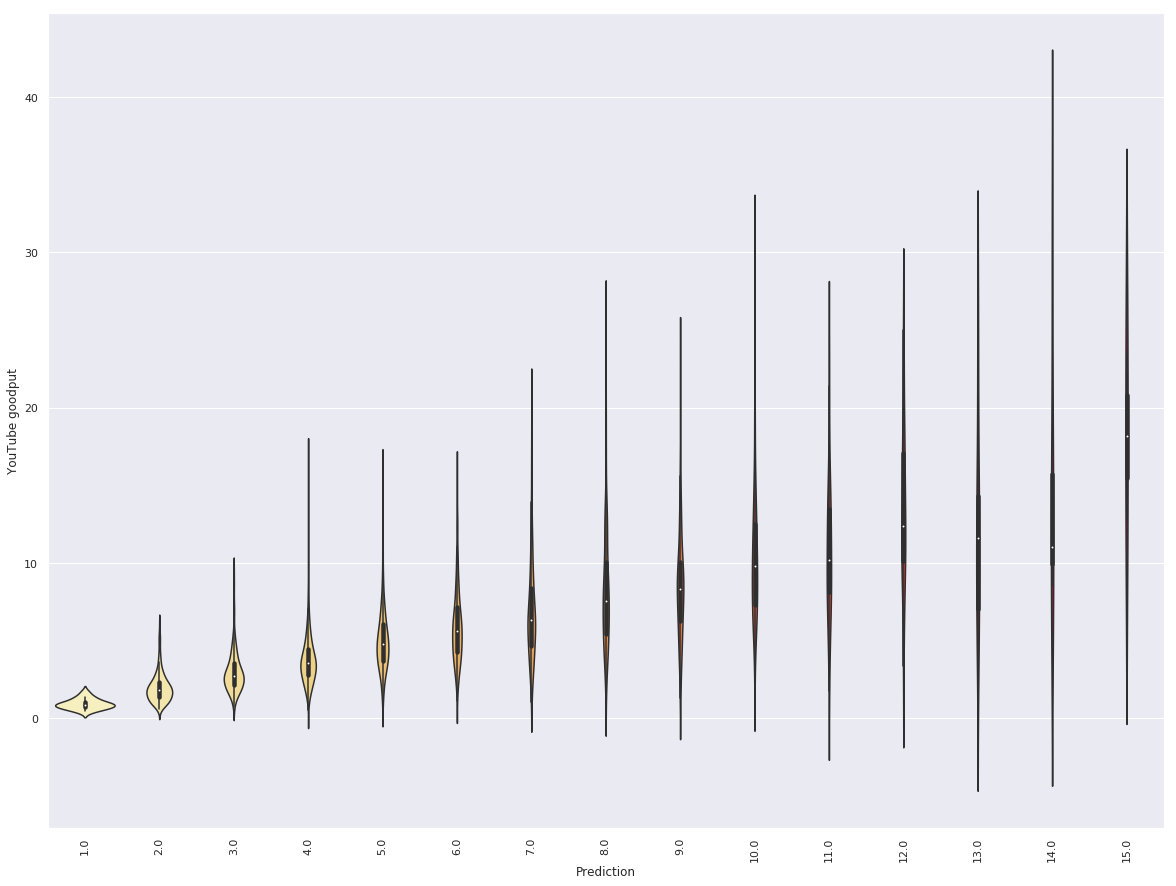

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(rc={'figure.figsize':(20,15)})
g = sns.violinplot(x=val['Prediction'], y=val['YouTube goodput'], data=val, showfliers=False, palette="YlOrRd")
g.set_xticklabels(g.get_xticklabels(),rotation=90)

#### More ...

1.Try more features (lags, differences).
2.Try tuning the model hyperparameters.
3.Try a neural network and ensemble with GBM.